In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import dist

In [45]:
img4 = cv2.imread('/Users/srujankasoju/Downloads/Cognida Coding Challenge/Mineral Processing Technology - Image Analytics/input/img4.png')
img3 = cv2.imread('/Users/srujankasoju/Downloads/Cognida Coding Challenge/Mineral Processing Technology - Image Analytics/input/img3.png')
img2 = cv2.imread('/Users/srujankasoju/Downloads/Cognida Coding Challenge/Mineral Processing Technology - Image Analytics/input/img2.png')
img5 = cv2.imread('/Users/srujankasoju/Downloads/Cognida Coding Challenge/Mineral Processing Technology - Image Analytics/input/img5.png')
img1 = cv2.imread('/Users/srujankasoju/Downloads/Cognida Coding Challenge/Mineral Processing Technology - Image Analytics/input/img1.png')

In [56]:
def analysis(image):
    # Sigma value is taken as 0.33 and calculating median, low, and high values for binary image    
    m = np.median(image)
    l = int(max(0, (0.67) * m))
    h = int(min(255, (1.33) * m))
    img= cv2.Canny(image, l, h)
    
    # to convert the image to binary form if needed, but our testcases are in binary form itself    
    bi_img = img
    contours, hierarchy = cv2.findContours(bi_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    # to get contour(border points of the shape) to visualize the shape with points
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

    # from this loop we calculate the area and perimeter of the shape   
    tsa = 0
    for i in contours:
        p = cv2.arcLength(i, True)
#         area = cv2.contourArea(contour)
        tsa += cv2.contourArea(i)
        approximatedShape = cv2.approxPolyDP(i, 0.02 * p, True)  
        
    # these are the co-ordinate points of the bounding circle with radius, by using cv2         
    (x, y), r = cv2.minEnclosingCircle(i) 

    
    g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold via Otsu + bias adjustment
    _, b = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    maxK = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Performing moments with kernerl size as 3 with 3 iterations
    Image = cv2.morphologyEx(b, cv2.MORPH_OPEN, maxK, None, None, 3, cv2.BORDER_REFLECT101)

    moments = cv2.moments(Image)

    # Computing centroid
    cenx = int(moments['m10']/moments['m00'])
    ceny = int(moments['m01']/moments['m00'])
    
    # draw border of the shape to visualize the perimeter     
    p_img = np.copy(image)
    cv2.drawContours(p_img, contours, -1, (255, 0, 0), thickness=6)
    
    # calculating the two points of the shape that gives max distance (major axis length)    
    m = 0
    p1 = None
    p2 = None
    for k in contours:
        for i in range(len(k)):
            for j in range(i + 1, len(k)):
                d = np.linalg.norm(k[i] - k[j])
                if d > m:
                    m = d
                    p1 = tuple(k[i][0])
                    p2 = tuple(k[j][0])

    return [x, y, r, p1, p2, tsa, p, p_img, cenx, ceny]



In [58]:
def output(i, image):
    cir = image.copy()
    cv2.circle(cir, (int(i[0]), int(i[1])), int(i[2]), (255,0,0), 6)
    maj = image.copy()                
    cv2.line(maj, i[3], i[4], (255, 0, 0), 5)
    cen = image.copy()
    cv2.circle(cen, (i[8], i[9]), 0, (255,0,0), 15)
    d=dist(i[3],i[4])
    
    plt.figure(figsize=(50,50))

    plt.subplot(5,2,1)
    plt.imshow(cir)
    plt.axis('off')

    plt.subplot(5,2,3)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(5,2,5)
    plt.imshow(maj)
    plt.axis('off')

    plt.subplot(5,2,7)
    plt.imshow(i[7])
    plt.axis('off')

    plt.subplot(5,2,9)
    plt.imshow(cen)
    plt.text(i[8]+10, i[9]+20, 'Centroid', fontsize=25, color='red')
    plt.axis('off')


    plt.subplot(5,2,2)
    plt.text(0, 0.5, 'Bounding circle is formed with center and radius as (', fontsize=30, color='red')
    plt.text(0.63, 0.5, int(i[0]), fontsize=30, color='red')
    plt.text(0.7, 0.5, ', ', fontsize=30, color='red')
    plt.text(0.72, 0.5, int(i[1]), fontsize=30, color='red')
    plt.text(0.79, 0.5, ') and ', fontsize=30, color='red')
    plt.text(0, 0.3, i[2], fontsize=30, color='red')
    plt.axis('off')


    plt.subplot(5,2,4)
    plt.text(0, 0.5, 'Total surface area is: ', fontsize=40, color='red')
    plt.text(0.33, 0.5, i[5], fontsize=40, color='red')
    plt.text(0.66, 0.5, 'Pixels', fontsize=40, color='red')
    plt.axis('off')


    plt.subplot(5,2,6)
    plt.text(0, 0.5, 'Major Axis line shown with lenght:', fontsize=40, color='red')
    plt.text(0.54, 0.5, d, fontsize=40, color='red')

    plt.axis('off')


    plt.subplot(5,2,8)
    plt.text(0, 0.5, 'Perimeter of the shape is: ', fontsize=40, color='red')
    plt.text(0.43, 0.5, i[6], fontsize=40, color='red')
    plt.axis('off')


    plt.subplot(5,2,10)
    plt.text(0, 0.5, 'centroid of the shape is formed at: (', fontsize=40, color='red')
    plt.text(0.57, 0.5, i[8], fontsize=40, color='red')
    plt.text(0.63, 0.5, ',', fontsize=40, color='red')
    plt.text(0.65, 0.5, i[9], fontsize=40, color='red')
    plt.text(0.72, 0.5, ')', fontsize=40, color='red')
    plt.axis('off')

    plt.show()
    return

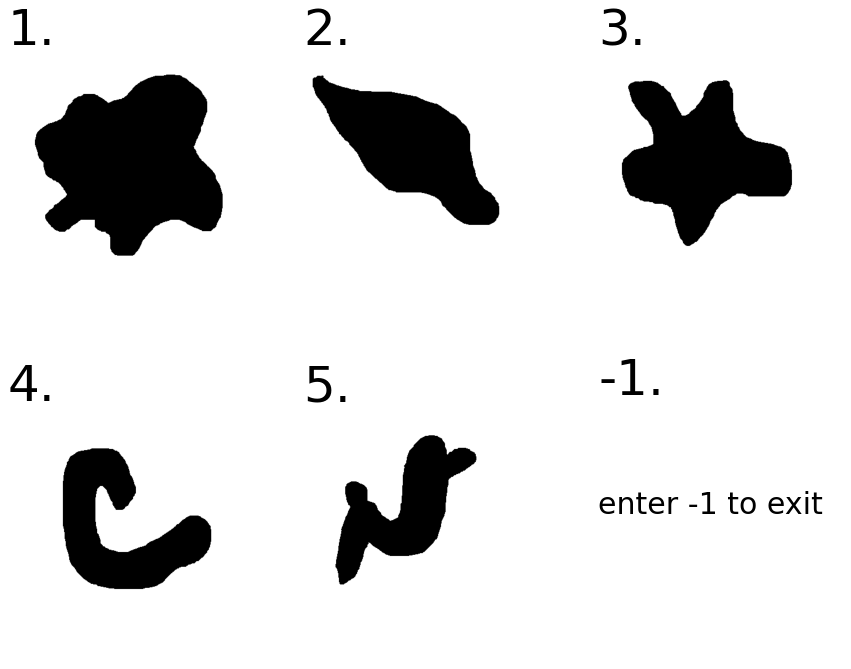

In [48]:

plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
plt.imshow(img1)
plt.text(0,0, '1.', fontsize=50)
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img2)
plt.text(0,0, '2.', fontsize=50)
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img3)
plt.text(0,0, '3.', fontsize=50)
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img4)
plt.text(0,0, '4.', fontsize=50)
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img5)
plt.text(0,0, '5.', fontsize=50)
plt.axis('off')

plt.subplot(2,3,6)
plt.text(0,0.9, '-1.', fontsize=50)
plt.text(0,0.5,'enter -1 to exit', fontsize=30)
plt.axis('off')

plt.show()

In [60]:
print('from the above testcases select any one :')
n= int(input())
while(n!=-1):
    if(n==1):
        image = img1
    elif(n==2):
        image = img2
    elif(n==3):
        image = img3
    elif(n==4):
        image = img4
    elif(n==5):
        image = img5
    else:
        print('select any valid shape given')
        n=int(input())
        continue
    i = analysis(image)
    output(i, image)
    print('from the above testcases select any one or enter -1 to exit :')
    n=int(input())    

from the above testcases select any one :
-1
